# Image Classification with Convolutional Neural Networks

In [1]:
#Using the MNIST dataset which contains 60000 training images of scanned handwritten digits each measuring 28 x 28 pixels
#Will use a CNN to recognize digits in the MNIST

from tensorflow.keras.datasets import mnist

(train_images,y_train),(test_images,y_test) = mnist.load_data()
x_train = train_images.reshape(60000,28,28,1)/255
x_test = test_images.reshape(10000,28,28,1)/255

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
#defining a cnn that accepts 28 x 28 x 1 arrays of pixel values as input, contains 2 pairs of convolution and pooling layers and has a softmax output layer
#with 10 neuron one for each digit

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d (Conv2D)                    (None, 26, 26, 32)              320         
                                                                                
 max_pooling2d (MaxPooling2D)       (None, 13, 13, 32)              0           
                                                                                
 conv2d_1 (Conv2D)                  (None, 11, 11, 64)              18496       
                                                                                
 max_pooling2d_1 (MaxPooling2D)     (None, 5, 5, 64)                0           
                                                                                
 flatten (Flatten)                  (None, 1600)                    0           
                                                                                
 dense (

In [3]:
#Training the network 
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 67s 53ms/step - loss: 0.1509 - accuracy: 0.9542 - val_loss: 0.0486 - val_accuracy: 0.9834
Epoch 2/10
1200/1200 [==============================] - 62s 52ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0408 - val_accuracy: 0.9861
Epoch 3/10
1200/1200 [==============================] - 64s 53ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0354 - val_accuracy: 0.9894
Epoch 4/10
1200/1200 [==============================] - 64s 53ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0288 - val_accuracy: 0.9903
Epoch 5/10
1200/1200 [==============================] - 61s 51ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0321 - val_accuracy: 0.9913
Epoch 6/10
1200/1200 [==============================] - 62s 51ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0271 - val_accuracy: 0.9917
Epoch 7/10
1200/1200 [==============================] - 64s 53ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0316 -

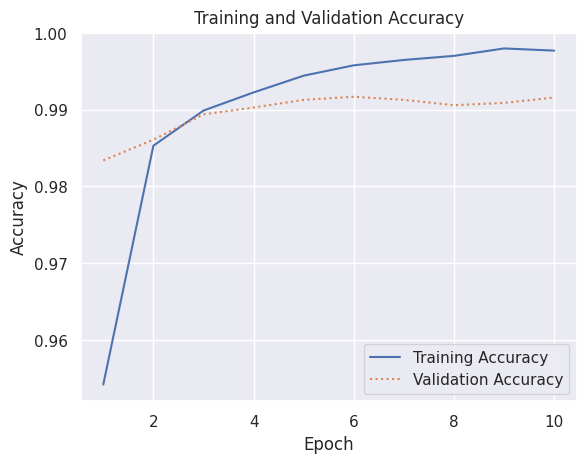

In [4]:
#Plotting the training and validation accuracy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Training a CNN to Recognize Arctic Wildlife

In [5]:
#defining a pair of helper functions one to load a batch of images and assigned labels
#and another to show the first eight images in a batch of images

import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_images_from_path(path, label):
    images, labels = [], []
 
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
         
    return images, labels
 
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
 
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
 
x_train, y_train, x_test, y_test = [], [], [], []

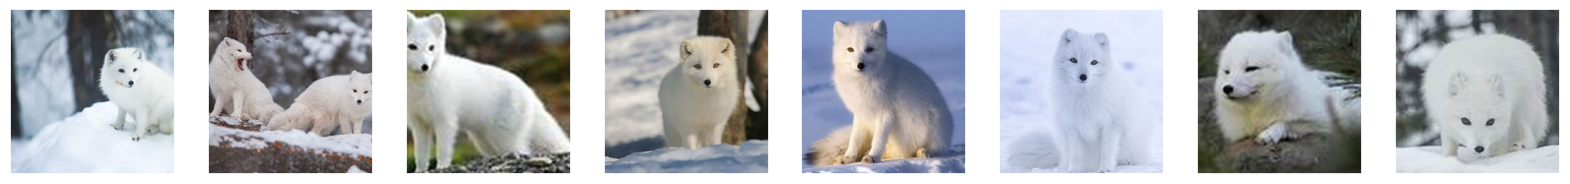

In [6]:
#Loading 100 Arctic fox training images and plot a subset of them

images, labels = load_images_from_path('/content/drive/MyDrive/Data/arctic-wildlife/train/arctic_fox', 0)
show_images(images)
    
x_train += images
y_train += labels

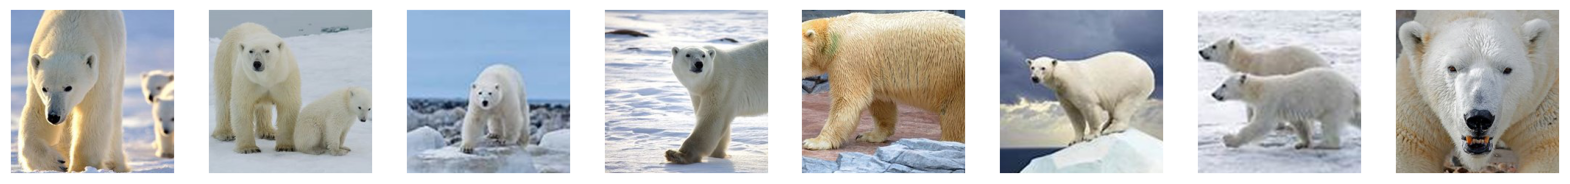

In [7]:
#Loading 100 polar bear training images and plot a subset of them

images, labels = load_images_from_path('/content/drive/MyDrive/Data/arctic-wildlife/train/polar_bear', 1)
show_images(images)
    
x_train += images
y_train += labels


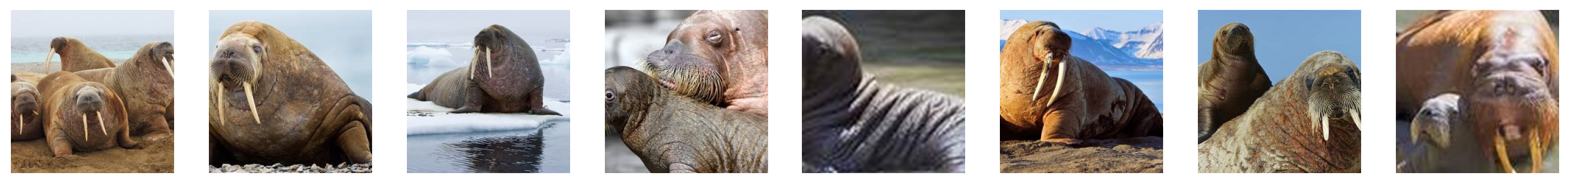

In [8]:
#Loading 100 walrus training images and plot a subset of them
images, labels = load_images_from_path('/content/drive/MyDrive/Data/arctic-wildlife/train/walrus', 2)
show_images(images)
    
x_train += images
y_train += labels

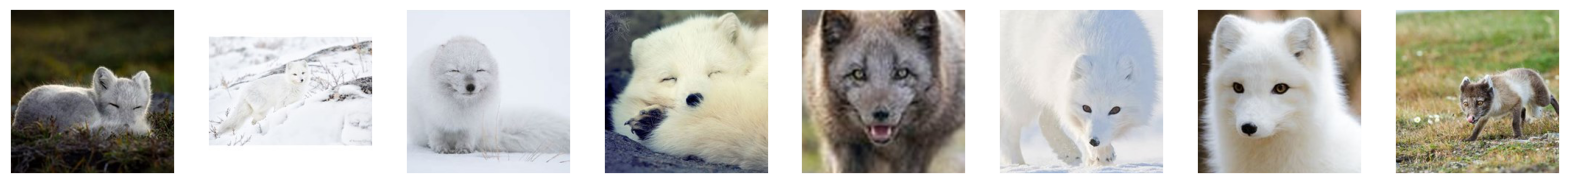

In [9]:
#Loading the validation images

images, labels = load_images_from_path('/content/drive/MyDrive/Data/arctic-wildlife/test/arctic_fox', 0)
show_images(images)

x_test += images
y_test += labels

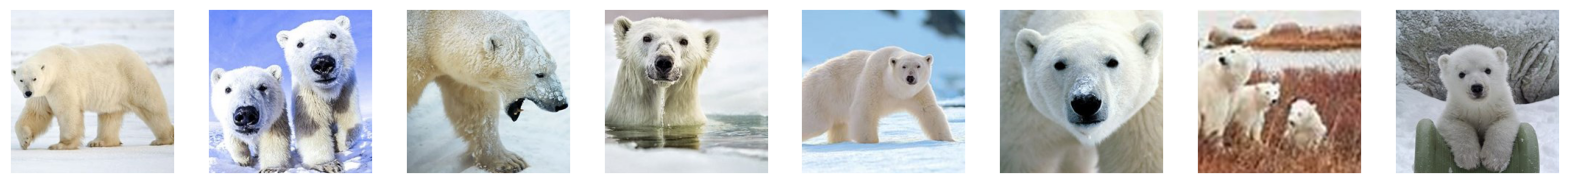

In [10]:
images, labels = load_images_from_path('/content/drive/MyDrive/Data/arctic-wildlife/test/polar_bear', 1)
show_images(images)

x_test += images
y_test += labels

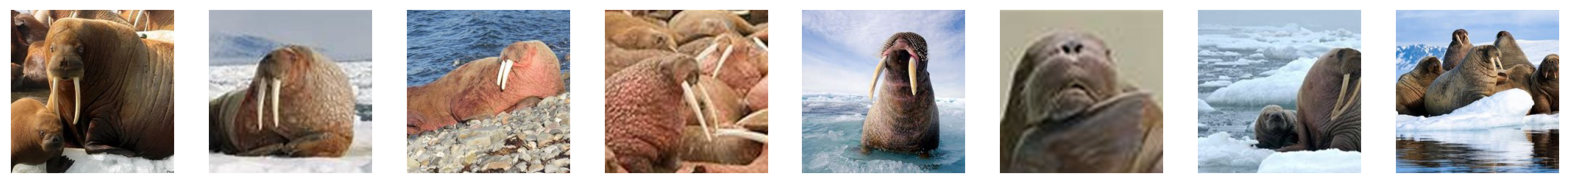

In [11]:
images, labels = load_images_from_path('/content/drive/MyDrive/Data/arctic-wildlife/test/walrus', 2)
show_images(images)

x_test += images
y_test += labels

In [12]:
# normalizing the training and testing images by dividing their pixel values by 255

import numpy as np
 
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
#Building the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_2 (Conv2D)                  (None, 222, 222, 32)            896         
                                                                                
 max_pooling2d_2 (MaxPooling2D)     (None, 111, 111, 32)            0           
                                                                                
 conv2d_3 (Conv2D)                  (None, 109, 109, 64)            18496       
                                                                                
 max_pooling2d_3 (MaxPooling2D)     (None, 54, 54, 64)              0           
                                                                                
 conv2d_4 (Conv2D)                  (None, 52, 52, 64)              36928       
                                                                                
 max_p

In [14]:
#Training the model

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Epoch 1/20
30/30 [==============================] - 40s 1s/step - loss: 1.1204 - accuracy: 0.3967 - val_loss: 1.0946 - val_accuracy: 0.3333
Epoch 2/20
30/30 [==============================] - 36s 1s/step - loss: 0.9496 - accuracy: 0.4933 - val_loss: 0.8936 - val_accuracy: 0.5500
Epoch 3/20
30/30 [==============================] - 37s 1s/step - loss: 0.8105 - accuracy: 0.6033 - val_loss: 0.9625 - val_accuracy: 0.5000
Epoch 4/20
30/30 [==============================] - 37s 1s/step - loss: 0.8748 - accuracy: 0.5633 - val_loss: 0.7565 - val_accuracy: 0.6667
Epoch 5/20
30/30 [==============================] - 37s 1s/step - loss: 0.6908 - accuracy: 0.6567 - val_loss: 1.2258 - val_accuracy: 0.3583
Epoch 6/20
30/30 [==============================] - 37s 1s/step - loss: 0.7324 - accuracy: 0.6467 - val_loss: 0.7789 - val_accuracy: 0.6583
Epoch 7/20
30/30 [==============================] - 37s 1s/step - loss: 0.6549 - accuracy: 0.6533 - val_loss: 1.0189 - val_accuracy: 0.5167
Epoch 8/20
30/30 [==

[]

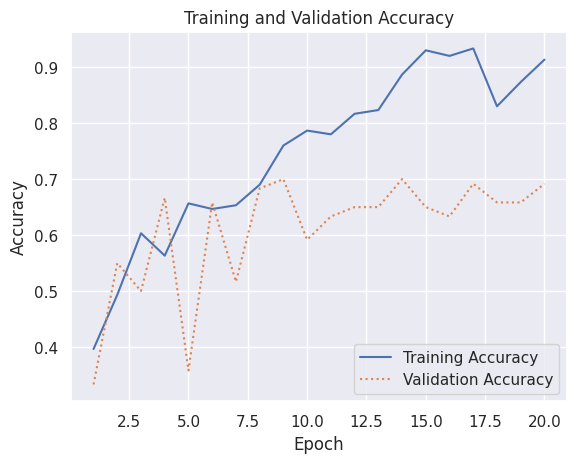

In [15]:
#plotting the training and validation accuracy

import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Using Transfer Learning to identify Arctic Wildlife

In [17]:
#Using ResNet as our pretrained CNN also using the resNet version of preprocess_input to preprocess the pixels. Then dividing the pixels by 255
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
 
x_train = preprocess_input(np.array(x_train)) / 255
x_test = preprocess_input(np.array(x_test)) / 255
     
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
#loading ResNet50V2

from tensorflow.keras.applications import ResNet50V2
 
base_model = ResNet50V2(weights='imagenet', include_top=False)
 
x_train = base_model.predict(x_train)
x_test = base_model.predict(x_test)

4/4 [==============================] - 19s 5s/step


In [19]:
#Training the neural net

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
 
model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=10)

Epoch 1/10
30/30 [==============================] - 81s 3s/step - loss: 5.2539 - accuracy: 0.3633 - val_loss: 1.7289 - val_accuracy: 0.4250
Epoch 2/10
30/30 [==============================] - 70s 2s/step - loss: 1.0091 - accuracy: 0.5767 - val_loss: 1.0921 - val_accuracy: 0.4833
Epoch 3/10
30/30 [==============================] - 63s 2s/step - loss: 0.7996 - accuracy: 0.6467 - val_loss: 1.1471 - val_accuracy: 0.4833
Epoch 4/10
30/30 [==============================] - 63s 2s/step - loss: 0.9653 - accuracy: 0.6467 - val_loss: 3.4890 - val_accuracy: 0.3417
Epoch 5/10
30/30 [==============================] - 64s 2s/step - loss: 1.2636 - accuracy: 0.6233 - val_loss: 1.3045 - val_accuracy: 0.5083
Epoch 6/10
30/30 [==============================] - 64s 2s/step - loss: 0.9173 - accuracy: 0.6700 - val_loss: 1.7274 - val_accuracy: 0.4583
Epoch 7/10
30/30 [==============================] - 64s 2s/step - loss: 0.8661 - accuracy: 0.6967 - val_loss: 1.0921 - val_accuracy: 0.5083
Epoch 8/10
30/30 [==

[]

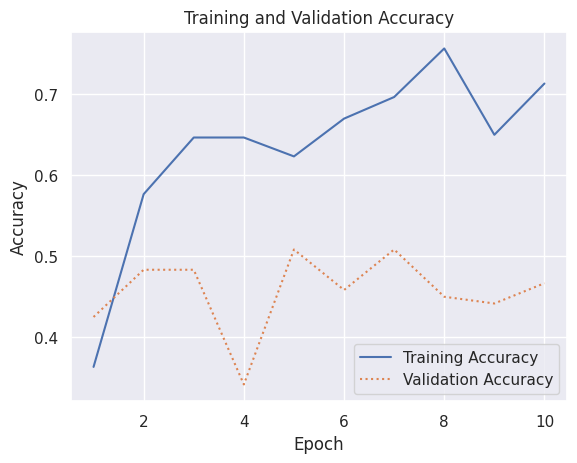

In [20]:
#Seeing how well the model did by plotting the accuracy and validation accuracy for each epoch

import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 [==============================] - 2s 370ms/step


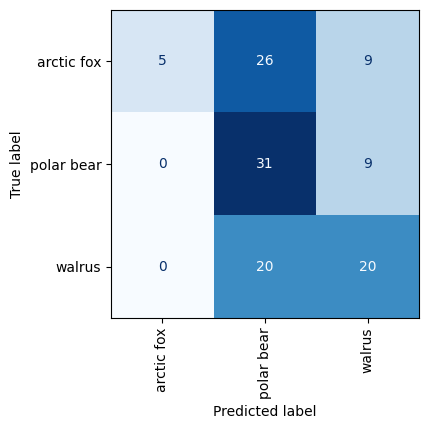

In [21]:
#creating a confusion matrix to see how well the network distinguishes classes:

from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid(False)

y_pred = model.predict(x_test)
class_labels = ['arctic fox', 'polar bear', 'walrus']

cmd.from_predictions(y_test, y_pred.argmax(axis=1),
                     display_labels=class_labels, colorbar=False,
                     cmap='Blues', xticks_rotation='vertical', ax=ax)